In [ ]:
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Завантаження JSON-файлу
file_path = 'entities.ftm.json'

# Відкриття JSON і конвертація у DataFrame
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Помилка декодування на рядку: {line}")
            continue
df = pd.DataFrame(data)
# Перевірка структури даних
if isinstance(data, list):  # Якщо JSON містить список об'єктів
    df = pd.DataFrame(data)
elif isinstance(data, dict):  # Якщо JSON є словником
    df = pd.json_normalize(data)
else:
    raise ValueError("Непідтримуваний формат JSON")


In [2]:

# Перевірка структури
print("Розмірність даних:")
print(df.shape)  # Кількість рядків і стовпців


Розмірність даних:
(2320832, 10)


In [3]:

print("\nПерші 5 записів:")
print(df.head())  # Перегляд перших записів



Перші 5 записів:
                                            id         caption        schema  \
0  ee-000000481ce6f73fb3d132cc5b2a7147d9373cea  Juhatuse liige  Directorship   
1  ee-00001120570bb34ca1bd0d32f49ce91f4ab6b41c       Ownership     Ownership   
2  ee-00001dfec0738be5ca86daf0a380735c0f79f95d       Ownership     Ownership   
3  ee-00002422f6f2bd274d5da1df2ef60f7a76e3f35f       Ownership     Ownership   
4  ee-00002762323f489fe9e4a14fb317d4bf31e2def6  Juhatuse liige  Directorship   

                                          properties referents  \
0  {'organization': ['ee-12991450'], 'director': ...        []   
1  {'owner': ['ee-officer-viktor-perelogin-ee-801...        []   
2  {'startDate': ['2019-07-25'], 'role': ['Juhatu...        []   
3  {'startDate': ['2018-10-10'], 'asset': ['ee-80...        []   
4  {'role': ['Juhatuse liige'], 'director': ['ee-...        []   

           datasets           first_seen            last_seen  \
0  [ee_ariregister]  2024-11-07T06:18:1

In [12]:

# Аналіз відсутніх даних
missing_data = df.isnull().sum()
print("\nКількість відсутніх значень у кожному стовпці:")
print(missing_data[missing_data > 0])  # Вивести тільки ті стовпці, де є пропуски





Кількість відсутніх значень у кожному стовпці:
organization          1438155
director              1438155
startDate             1048949
role                  1048950
owner                 1944262
asset                 1944262
client                2308196
agent                 2308196
website               2299625
incorporationDate     1969350
phone                 2102889
name                  1271883
registrationNumber    1967168
address               1866548
sourceUrl             1969350
email                 1981410
status                1969350
jurisdiction          1969350
legalForm             1969350
country               1748049
lastName              1701636
firstName             1701637
start_year            1048949
dtype: int64


In [15]:
# Вибір стовпців без вкладених структур
scalar_columns = [col for col in df.columns if df[col].map(type).isin([int, float, str, bool]).all()]
print("\nУнікальні значення для простих стовпців:")
print(df[scalar_columns].nunique())



Унікальні значення для простих стовпців:
id             2320832
caption         689260
schema               8
first_seen          64
last_seen            1
last_change         64
target               1
dtype: int64


In [16]:
# Виявлення стовпців із вкладеними структурами
problematic_columns = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (dict, list))).any()]
print(f"Стовпці з вкладеними структурами: {problematic_columns}")

Стовпці з вкладеними структурами: ['properties', 'referents', 'datasets', 'organization', 'director', 'startDate', 'role', 'owner', 'asset', 'client', 'agent', 'website', 'incorporationDate', 'phone', 'name', 'registrationNumber', 'address', 'sourceUrl', 'email', 'status', 'jurisdiction', 'legalForm', 'country', 'lastName', 'firstName', 'start_year']


In [4]:
# Розгортання вкладених стовпців
property_columns = ['organization', 'director', 'startDate', 'role', 'owner', 'asset', 'client', 'agent',
                    'website', 'incorporationDate', 'phone', 'name', 'registrationNumber', 'address',
                    'sourceUrl', 'email', 'status', 'jurisdiction', 'legalForm', 'country', 'lastName', 'firstName']


for column in property_columns:
    df[column] = df['properties'].apply(lambda x: x.get(column) if isinstance(x, dict) else None)


In [5]:
print("\nТипи даних:")
print(df.dtypes)  # Типи даних 



Типи даних:
id                    object
caption               object
schema                object
properties            object
referents             object
datasets              object
first_seen            object
last_seen             object
last_change           object
target                  bool
organization          object
director              object
startDate             object
role                  object
owner                 object
asset                 object
client                object
agent                 object
website               object
incorporationDate     object
phone                 object
name                  object
registrationNumber    object
address               object
sourceUrl             object
email                 object
status                object
jurisdiction          object
legalForm             object
country               object
lastName              object
firstName             object
dtype: object


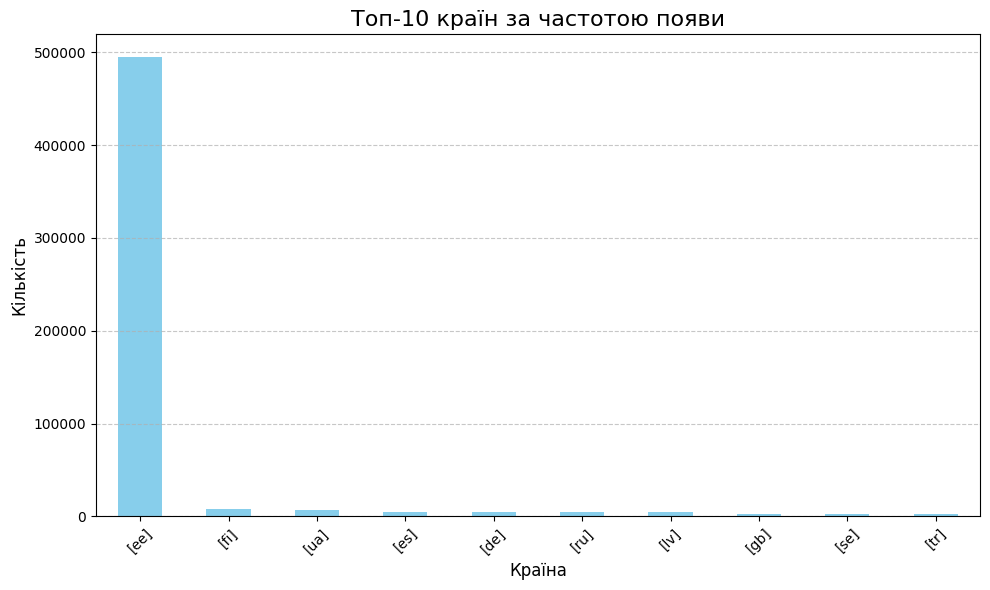

In [13]:

# Підрахунок частоти кожної країни
country_counts = df['country'].value_counts()


plt.figure(figsize=(10, 6))
country_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Топ-10 країн за частотою появи', fontsize=16)
plt.xlabel('Країна', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

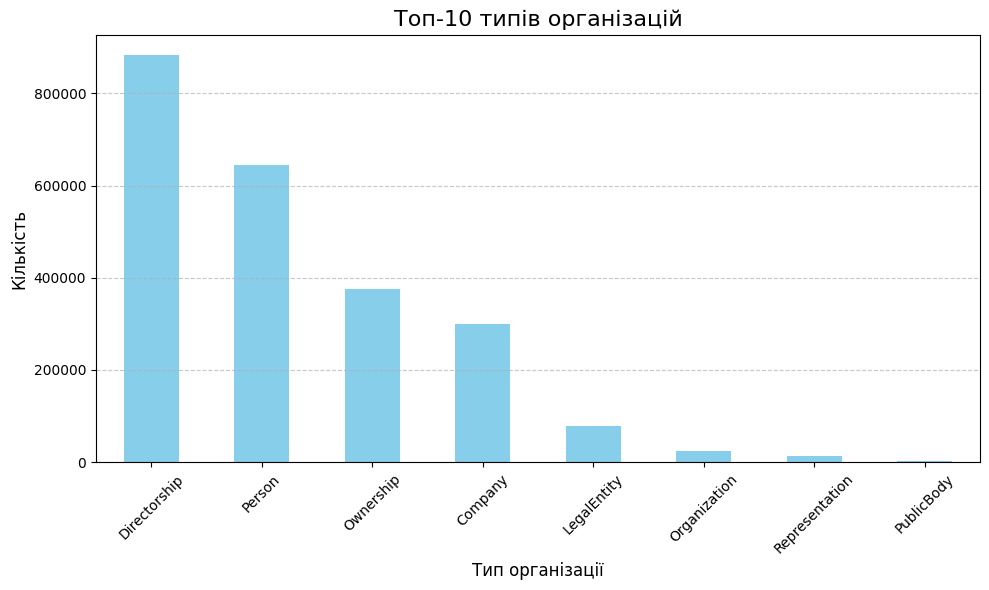

In [7]:
# Підрахунок типів організацій

schema_counts = df['schema'].value_counts()
plt.figure(figsize=(10, 6))
schema_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Топ-10 типів організацій', fontsize=16)
plt.xlabel('Тип організації', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

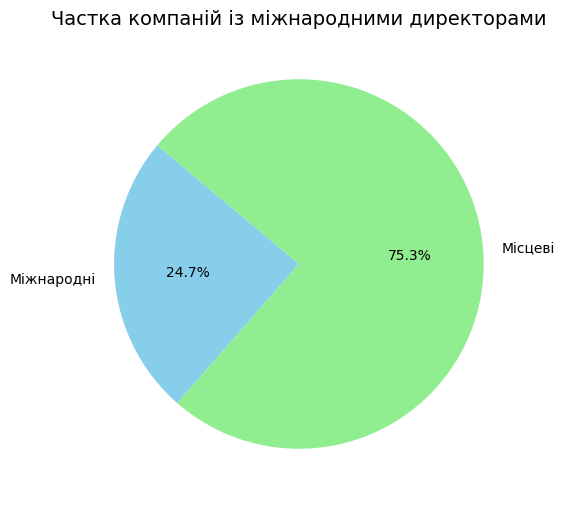

In [9]:
# Аналіз міжнародних директорів

non_nan_countries = df['country'][~df['country'].isna()]
international_directors = df[df['country'] != '[ee]']

share_international = len(non_nan_countries) / len(df) * 100

plt.figure(figsize=(6, 6))
plt.pie([share_international, 100 - share_international],
        labels=['Міжнародні', 'Місцеві'],
        autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Частка компаній із міжнародними директорами', fontsize=14)
plt.show()


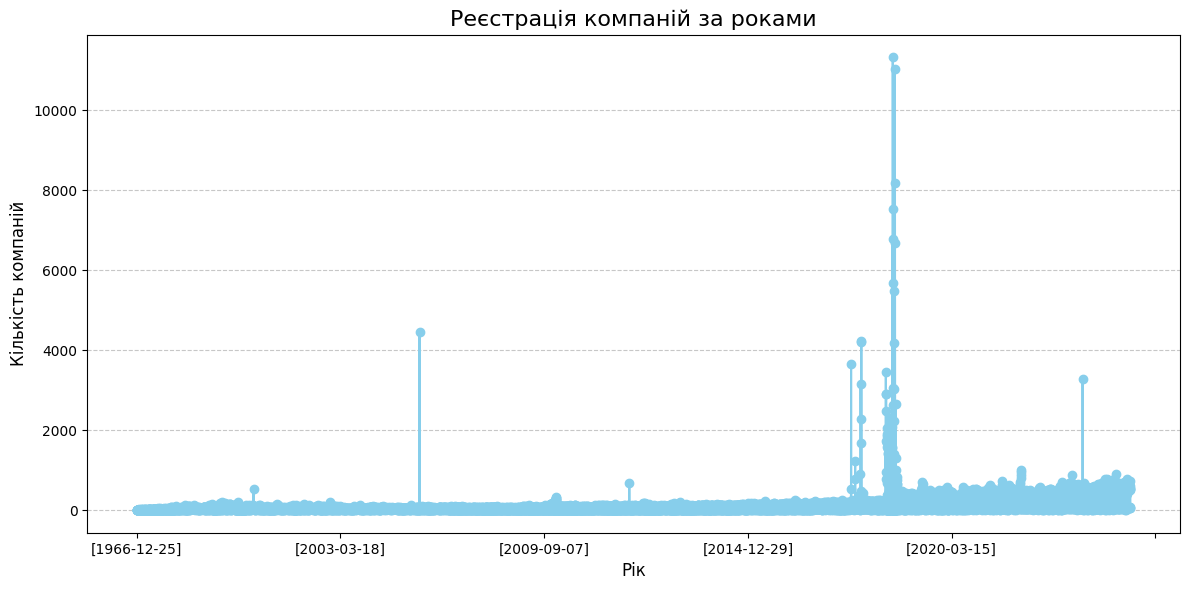

In [10]:


df['start_year'] = df['startDate']
yearly_counts = df['start_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o', color='skyblue')
plt.title('Реєстрація компаній за роками', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Кількість компаній', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

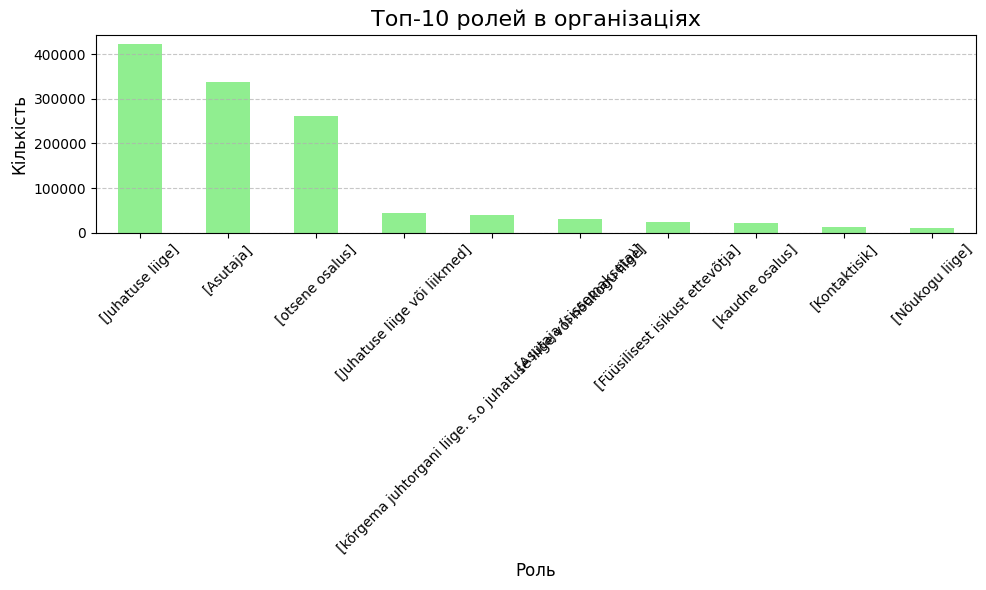

In [11]:

# Розподіл значень у стовпці 'role'
role_counts = df['role'].value_counts()

# Побудова графіка
plt.figure(figsize=(10, 6))
role_counts.head(10).plot(kind='bar', color='lightgreen')
plt.title('Топ-10 ролей в організаціях', fontsize=16)
plt.xlabel('Роль', fontsize=12)
plt.ylabel('Кількість', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




In [5]:


# Параметри підключення до бази даних
DB_TYPE = 'postgresql'  
DB_USER = 'postgres'
DB_PASSWORD = '111'
DB_HOST = 'localhost'
DB_PORT = '5432'  
DB_NAME = 'test_task'


engine = create_engine(f"{DB_TYPE}://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

def write_to_db(df, table_name, engine):
    try:
        df.to_sql(table_name, engine, if_exists='append', index=False)
        print(f"Дані успішно вставлено в таблицю {table_name}.")
    except Exception as e:
        print(f"Помилка вставки в таблицю {table_name}: {e}")

# Розподіл даних на відповідні таблиці

# 1. Таблиця 'organizations'
organizations_columns = [
    'id', 'caption', 'schema', 'first_seen', 'last_seen', 'last_change', 'target',
    'country', 'status', 'jurisdiction', 'legalForm', 'address', 'phone', 'email',
    'website', 'sourceUrl', 'registrationNumber', 'startDate', 'incorporationDate'
]
organizations_df = df[organizations_columns]
write_to_db(organizations_df, 'organizations', engine)

# 2. Таблиця 'persons'
persons_columns = ['firstName', 'lastName', 'role', 'country', 'organization']
persons_df = df[persons_columns].rename(columns={'organization': 'organization_id'})
write_to_db(persons_df, 'persons', engine)

# 3. Таблиця 'assets'
assets_columns = ['asset', 'organization']
assets_df = df[assets_columns].rename(columns={'organization': 'organization_id', 'asset': 'name'})
write_to_db(assets_df, 'assets', engine)

# 4. Таблиця 'relations'
relations_columns = ['client', 'agent', 'organization']
relations_df = df[relations_columns].melt(
    id_vars=['organization'], 
    value_vars=['client', 'agent'], 
    var_name='type', 
    value_name='related_organization_id'
).dropna()
relations_df = relations_df.rename(columns={'organization': 'organization_id'})
write_to_db(relations_df, 'relations', engine)

Дані успішно вставлено в таблицю organizations.
Дані успішно вставлено в таблицю persons.
Дані успішно вставлено в таблицю assets.
Дані успішно вставлено в таблицю relations.
